# Evaluating LLMs (large language models)

There are several methodologies for evaluating the results of LLMs. Each with their own set of trade offs and advantages.

1. **Programmatic Rule-based Evaluation**:
    - **Description**: This method involves setting specific, objective rules for evaluating Large Language Model (LLM) outputs. For instance, if the task is to write a blog post, a straightforward metric could be setting a minimum word count of 300 words.
    - **Advantages**: Quick feedback loop and cost-effective, as it does not require extensive resources.
    - **Disadvantages**: Developing metrics can be challenging for complex tasks, especially those with nuanced or subjective criteria.
    - **When to Use**: Ideal for tasks with easily definable rules that significantly improve LLM accuracy.

2. **LLM-Based Evaluation**:
    - **Description**: Uses another LLM to assess the quality of a previous LLM's output, particularly for subjective attributes like helpfulness or readability. This approach leverages the LLM as a classifier to determine the quality of results.
    - **Advantages**: Effective for subjective or nuanced criteria, eliminating the need for manual metric creation.
    - **Disadvantages**: Increased evaluation time and cost due to the use of additional LLMs.
    - **When to Use**: Suitable when rule-based methods fall short, especially for nuanced or context-rich tasks. Also it's useful for bootstrapping data for fine-tuning, as demonstrated when labeling training data with GPT-4 before comparing it with outputs from a model like Mistral.

3. **Human-Based Evaluation**:
    - **Description**: Relies on human judgment to assess LLM outputs, either through simple approval/disapproval ratings or by choosing the best result from multiple options.
    - **Advantages**: Offers the highest accuracy due to human intelligence, reducing the likelihood of false positives and negatives (excluding human error).
    - **Disadvantages**: Prone to human error, and is the most expensive and time-consuming method due to the need for substantial human input.
    - **When to Use**: Best for high-stakes tasks requiring utmost accuracy. Using a data labeling service (e.g., on AWS, Azure, or GCP) can reduce time but at a higher cost.

These methods allow you to tailor your evaluation strategy to your specific needs, ensuring that your LLM produces results that are both accurate and relevant to your audience. By understanding the strengths and limitations of each approach, you can choose the most effective method for your particular project, making you the master of your LLM's performance.

In [ ]:
%pip install langchain langchain_openai numpy pandas openai ipywidgets tqdm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 26.2

In [ ]:
# import os

# os.environ["OPENAI_API_KEY"] = "API_KEY_HERE"

In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


---

## Enhancing Evaluation Strategies with Combined Techniques

Combining different evaluation methods can optimize your results. Start with an LLM-based evaluation, such as using GPT-4 for initial labeling. This approach rapidly generates a baseline of labels and helps in comparing various models or prompts against a set standard.

Next, introduce human oversight. Have experts review the labels created by GPT-4, focusing on identifying and correcting any inaccuracies, such as false positives or negatives. This step ensures a higher level of precision in your evaluation process.

## Minimizing Human Error for Superior Accuracy

To achieve even greater accuracy and minimize human error, consider a multi-evaluator approach. Instead of relying on a single individual's judgment for each label, involve three reviewers and use the majority decision (at least 2 out of 3 agreeing) as the final label. This method significantly reduces the likelihood of errors.

Moreover, refining the guidelines for evaluators can make a substantial difference. Clear, well-defined criteria help reviewers make more confident and accurate decisions, especially in ambiguous cases. Enhancing the clarity and distinction between different classes or outcomes in your guidelines can lead to a noticeable decrease in false positives and negatives, elevating the overall quality of your evaluation.

--------------------------------------------------------

In the sections below, you'll find all three of these techniques shown using mocked data and the simplest implementation to help build your intuition with evaluation.

---

## Programmatic Rule-based Evaluation

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
llm_results = [
    "Coding is fun.",
    "I am learning about coding and I wanted to know how to write a for loop, so I decided to learn JavaScript",
    "Using strong types in code is the way forward #dev",
    "learning about data engineering is fun and I had a great time at the conference! #devOps",
    "Have you ever considered that learning DevOps might be useful for your career? See this thread #DevOps #Software",
    "I love making software #dev",
    "I love my dog. #dogs",
    "Cats are awesome. #cats",
    "It's always good to be with your family and friends."
    "Software is awesome #software"
    "Data science is really fun and I can't wait to share what I've learned with you at DataScienceCon! #data"
]

In [ ]:
# Social media post text length:
social_post_df = pd.DataFrame(
    {"generated_social_media_post": llm_results}  # Adding a toy dataset for LLM results
)

In [ ]:
social_post_df

,generated_social_media_post
0,Coding is fun.
1,I am learning about coding and I wanted to kno...
2,Using strong types in code is the way forward ...
3,learning about data engineering is fun and I h...
4,Have you ever considered that learning DevOps ...
5,I love making software #dev
6,I love my dog. #dogs
7,Cats are awesome. #cats
8,It's always good to be with your family and fr...


Let's make 2x rule based evaluation metrics for your social media posts for X. You'll define that good social media posts must contain:
- At least 1 hashtag.
- Have be greater or equal to 30 characters, but not more than 200 characters (demonstrating a sufficient length).


In [ ]:
def eval_has_hashtag(text: str) -> bool:
    if "#" in text:
        return True
    else:
        return False

def eval_length_of_social_post(text: str) -> bool:
    if len(text) >= 30 and len(text) <= 150:
        return True
    else:
        return False

# This is used for one-hot encoding the boolean results into an integer
# so that it can be counted when calculating accuracy.
def convert_boolean_to_one_hot_encoding(bool_result: bool) -> int:
    if bool_result: return 1
    return 0

Then, you need to evaluate the dataset and find out the accuracy rate for each eval:

In [ ]:
# Add all of your evaluation functions here:
eval_functions = {
    "eval_has_hashtag": eval_has_hashtag,
    "eval_length_of_social_post": eval_length_of_social_post,
}

# For each row, loop through:
for index, row in social_post_df.iterrows():
    # For each eval, run the eval and store the output in a new column for that row:
    for key, value in eval_functions.items():
        # Find the right eval function:
        eval_function_to_call = eval_functions[key]

        # Call the eval function and save to a column in the original df:
        eval_result = eval_function_to_call(row["generated_social_media_post"])

        # Save to column at index position,
        # this also converts the boolean to 1 for success and 0 for failure on the evaluation:
        social_post_df.loc[index, key] = convert_boolean_to_one_hot_encoding(
            eval_result
        )

social_post_df.head(5)

,generated_social_media_post,eval_has_hashtag,eval_length_of_social_post
0,Coding is fun.,0.0,0.0
1,I am learning about coding and I wanted to kno...,0.0,1.0
2,Using strong types in code is the way forward ...,1.0,1.0
3,learning about data engineering is fun and I h...,1.0,1.0
4,Have you ever considered that learning DevOps ...,1.0,1.0


Let's now calculate the accuracy for each evaluation column within the `pandas` dataframe:

In [ ]:
eval_columns = [col for col in social_post_df.columns if "eval" in col]
print(eval_columns)

['eval_has_hashtag', 'eval_length_of_social_post']


In [ ]:
eval_accuracy_results = {}

for col in eval_columns:
    # Get that eval column:
    single_eval_results = social_post_df[col]

    # Compare to the length and calculate the accuracy:
    single_eval_accuracy = single_eval_results.sum() / len(single_eval_results)

    # Save to the eval_accuracy_results dictionary:
    eval_accuracy_results[col] = single_eval_accuracy

In [ ]:
print(eval_accuracy_results)

{'eval_has_hashtag': 0.7777777777777778, 'eval_length_of_social_post': 0.4444444444444444}


---

## Blending Multiple Evaluation Metrics into a Single Score

If you want to optimize across multiple metrics, you can:
- Calculate the mean across multiple evaluation metrics to get a balanced result.
- Weight multiple evaluation metrics by a certain percentage, depending upon what metrics are more important.

Let's look at calculating the mean of the two previous evals:

In [ ]:
mean_evals_accuracy = np.mean(list(eval_accuracy_results.values()))
print(mean_evals_accuracy) # 61% accuracy

0.6111111111111112


To demonstrate weighting multiple evaluation metrics by different percentages based on their importance, let's assume we have two evaluation metrics: `eval_has_hashtag` and `eval_length_of_social_post`. We'll assign a weight of 70% to `eval_has_hashtag` (as it might be more critical for social media engagement) and 30% to `eval_length_of_social_post`.

Here's a simple example illustrating this approach:

In [ ]:
# Define weights for each evaluation metric
weights = {
    "eval_has_hashtag": 0.7,  # 70% weight
    "eval_length_of_social_post": 0.3,  # 30% weight
}

# Initialize a variable to store the weighted average
weighted_avg_accuracy = 0

# Calculate the weighted average accuracy
for eval_metric, accuracy in eval_accuracy_results.items():
    weighted_avg_accuracy += accuracy * weights[eval_metric]

print(f"The weighted average accuracy: {weighted_avg_accuracy:.2f}")

The weighted average accuracy: 0.68


In this example, the final `weighted_avg_accuracy` represents the overall accuracy of your LLM results, taking into account the relative importance of each evaluation metric. This method provides a more nuanced view of performance, especially when some aspects of the evaluation are prioritized over others.

---

## LLM Based Evaluation

Let's assume you wanted to figure out if some of the social media posts generated were on the topic of coding/software. Using a known list of keywords would suffice, however it would likely not contain all of the known coding keywords and wouldn't generalise for different languages.

Instead let's create a GPT-4 classifer that's responsible for identifying whether the _topic is related to coding_.

First, you'll add all of the true labels to the `pandas` dataframe:

In [ ]:
# Adding the true labels to the dataframe (based on whether the topic is coding or not):
true_labels = [1, 1, 1, 1, 1, 1, 0, 0, 0]
social_post_df["is_coding_true_labels"] = true_labels

In [19]:
social_post_df

,generated_social_media_post,eval_has_hashtag,eval_length_of_social_post,is_coding_true_labels
0,Coding is fun.,0.0,0.0,1
1,I am learning about coding and I wanted to kno...,0.0,1.0,1
2,Using strong types in code is the way forward ...,1.0,1.0,1
3,learning about data engineering is fun and I h...,1.0,1.0,1
4,Have you ever considered that learning DevOps ...,1.0,1.0,1
5,I love making software #dev,1.0,0.0,1
6,I love my dog. #dogs,1.0,0.0,0
7,Cats are awesome. #cats,1.0,0.0,0
8,It's always good to be with your family and fr...,1.0,0.0,0


In [ ]:
import getpass
import os

os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

··········


In [21]:
pip install --upgrade pydantic


In [22]:
from langchain_openai.chat_models import ChatOpenAI
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import ChatPromptTemplate
from pydantic.v1 import BaseModel, Field

# 1. Define the model:
model = ChatOpenAI(
    model="gpt-4-1106-preview",
    model_kwargs={"response_format": {"type": "json_object"}},
)

# 2. Define the prompt:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """Act as a content editor, you are responsible for classifying
            social media posts using the following format instructions.
            Format Instructions: {format_instructions}
              """,
        ),
        (
            "user",
            """Social media post text: {generated_social_media_post}
            The topic to be classified against is: {topic}
            """,
        ),
    ]
)


# 3. Define the pydantic model:
class SocialMediaPostClassifier(BaseModel):
    is_topic: int = Field(
        default=0,
        description="""This field is a classification result for
                           whether a result is identified against a known topic. 1 for yes and 0 for no.""",
    )


# 4. Define the output parser:
output_parser = PydanticOutputParser(pydantic_object=SocialMediaPostClassifier)

# 5. Create an LCEL chain:
chain = prompt | model | output_parser

# 6. Invoke the chain for the whole dataset:
results = []
TOPIC = "coding, software or data science"

# For each row, loop through:
for index, row in social_post_df.iterrows():
    result = chain.invoke(
        {
            "generated_social_media_post": row["generated_social_media_post"],
            "format_instructions": output_parser.get_format_instructions(),
            "topic": TOPIC
        }
    )
    # Extract the is_topic property from the Pydantic model:
    results.append(result.is_topic)

# Save the results to a new column:
social_post_df['eval_is_coding_topic'] = results

AttributeError: type object 'SocialMediaPostClassifier' has no attribute 'model_json_schema'

---

Let's calculate the accuracy of the LLM generated evaluation against the known true labels from the `is_coding_true_labels` column:

In [ ]:
social_post_df

,generated_social_media_post,eval_has_hashtag,eval_length_of_social_post,is_coding_true_labels,eval_is_coding_topic
0,Coding is fun.,0.0,0.0,1,1
1,I am learning about coding and I wanted to kno...,0.0,1.0,1,1
2,Using strong types in code is the way forward ...,1.0,1.0,1,1
3,learning about data engineering is fun and I h...,1.0,1.0,1,1
4,Have you ever considered that learning DevOps ...,1.0,1.0,1,1
5,I love making software #dev,1.0,0.0,1,1
6,I love my dog. #dogs,1.0,0.0,0,0
7,Cats are awesome. #cats,1.0,0.0,0,0
8,It's always good to be with your family and fr...,1.0,0.0,0,1


In [ ]:
# Loop through each row and calculate the accuracy against the true labels:
true_labels = social_post_df["is_coding_true_labels"]
eval_results = social_post_df["eval_is_coding_topic"]

# Loop through and check for equality in terms of 0 or 1 for each row, when it is equal, add 1 to the count:
count = 0
for index, row in social_post_df.iterrows():
    if row["is_coding_true_labels"] == row["eval_is_coding_topic"]:
        count += 1

single_eval_accuracy = count / len(true_labels)

In [ ]:
print(f"GPT-4 achieved {round(single_eval_accuracy, 2) * 100} % accuracy against the true labels.")

GPT-4 achieved 89.0 % accuracy against the true labels.


---

## Generate Ground Truth Data with GPT-4 API

Creating the known labels or ground truth data can be time consuming and expensive. You can use GPT-4 to _generate the ground truth data_ for you. This is useful for training your own models, and for evaluating the performance of other models. Then you can use these evals to test whether the open source or smaller / faster / cheaper models are performing as well as the larger / slower / more expensive models.

In [28]:
import requests
import io

# Dataset URL:
url = "https://storage.googleapis.com/oreilly-content/transaction_data_with_expanded_descriptions.csv"

# Download the file from the URL:
downloaded_file = requests.get(url)

# Load the transactions dataset and only look at 20 transactions:
df = pd.read_csv(io.StringIO(downloaded_file.text))[:20]

In [29]:
# Run through the dataset using GPT-4 to correctly classify the transactions
from langchain_openai.chat_models import ChatOpenAI
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel
from typing import Literal, Union

# 1. Define the model:
model = ChatOpenAI(
    model="gpt-4-1106-preview",
    model_kwargs={"response_format": {"type": "json_object"}},
)

system_prompt = """You are are an expert at analyzing bank transactions,
you will be categorising a single transaction.
Format Instructions:{format_instructions}"""

user_prompt = """Transaction Text:{transaction}"""

# 2. Define the prompt:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            system_prompt,
        ),
        (
            "user",
            user_prompt,
        ),
    ]
)

# 3. Define the pydantic model:
class EnrichedTransactionInformation(BaseModel):
    transaction_type: Union[
        Literal["Purchase", "Withdrawal", "Deposit", "Bill Payment", "Refund"], None
    ]
    transaction_category: Union[
        Literal["Food", "Entertainment", "Transport", "Utilities", "Rent", "Other"],
        None,
    ]


# 4. Define the output parser:
output_parser = PydanticOutputParser(pydantic_object=EnrichedTransactionInformation)

# 5. Create an LCEL chain:
chain = prompt | model | output_parser

# 6. Invoke the chain for the whole dataset:
results = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    transaction = row["Transaction Description"]
    result = chain.invoke(
        {
            "transaction": transaction,
            "format_instructions": output_parser.get_format_instructions(),
        }
    )
    results.append(result)

100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


In [30]:
df.head()

,Transaction Description
0,cash deposit at local branch
1,cash deposit at local branch
2,withdrew money for rent payment
3,withdrew cash for weekend expenses
4,purchased books from the bookstore


In [31]:
# 7. Add the results to the dataframe, as columns transaction type and transaction category
transaction_types = []
transaction_categories = []

for result in results:
    transaction_types.append(result.transaction_type)
    transaction_categories.append(result.transaction_category)

df["transaction_type"] = transaction_types
df["transaction_category"] = transaction_categories
df.head()

,Transaction Description,transaction_type,transaction_category
0,cash deposit at local branch,Deposit,Other
1,cash deposit at local branch,Deposit,Other
2,withdrew money for rent payment,Withdrawal,Rent
3,withdrew cash for weekend expenses,Withdrawal,Other
4,purchased books from the bookstore,Purchase,Other


------------------------------------------------------------------

## Obtain the Accuracy of GPT-3.5 Turbo API:

In [32]:
# 1. Define the model:
model = ChatOpenAI(
    model="gpt-3.5-turbo-1106",
    model_kwargs={"response_format": {"type": "json_object"}},
)

# 2. Invoke the chain:
chain = prompt | model | output_parser
results = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    transaction = row["Transaction Description"]
    try:
        result = chain.invoke(
            {
                "transaction": transaction,
                "format_instructions": output_parser.get_format_instructions(),
            }
        )
        results.append(result)
    except:
        # If there is an error, return None for both transaction type and transaction category
        result = """{"transaction_type": null, "transaction_category": null}"""
        results.append(output_parser.parse(result))

# 3. Add the results to the dataframe, as columns transaction type and transaction category
transaction_types = []
transaction_categories = []

for i, result in enumerate(results):
    print(i, result)

    transaction_types.append(result.transaction_type)
    transaction_categories.append(result.transaction_category)

df["gpt-3.5_transaction_type"] = transaction_types
df["gpt-3.5_transaction_category"] = transaction_categories

100%|██████████| 20/20 [00:08<00:00,  2.25it/s]

0 transaction_type='Deposit' transaction_category=None
1 transaction_type='Deposit' transaction_category=None
2 transaction_type='Withdrawal' transaction_category='Rent'
3 transaction_type='Withdrawal' transaction_category='Entertainment'
4 transaction_type='Purchase' transaction_category='Entertainment'
5 transaction_type=None transaction_category=None
6 transaction_type='Refund' transaction_category='Other'
7 transaction_type='Withdrawal' transaction_category='Rent'
8 transaction_type='Refund' transaction_category='Other'
9 transaction_type='Bill Payment' transaction_category='Utilities'
10 transaction_type='Purchase' transaction_category='Food'
11 transaction_type='Refund' transaction_category='Other'
12 transaction_type='Withdrawal' transaction_category='Rent'
13 transaction_type='Deposit' transaction_category='Other'
14 transaction_type='Purchase' transaction_category='Entertainment'
15 transaction_type='Purchase' transaction_category='Other'
16 transaction_type='Bill Payment' tra

After classifying the transactions with GPT-3.5-Turbo, you can evaluate the accuracy against the previously generated ground truth from GPT-4 by looping through the dataframe and comparing each row:

In [34]:
# Loop through the dataframe and compare the transaction type and transaction category columns:
transaction_type_counter = 0
transaction_category_counter = 0

for i, row in df.iterrows():
    if row["gpt-3.5_transaction_type"] == row["transaction_type"]:
        transaction_type_counter += 1
    if row["gpt-3.5_transaction_category"] == row["transaction_category"]:
        transaction_category_counter += 1

print("GPT-3.5-Turbo Transaction Type Accuracy: ", transaction_type_counter / len(df))
print(
    "GPT-3.5-Turbo Transaction Category Accuracy: ",
    transaction_category_counter / len(df),
)

GPT-3.5-Turbo Transaction Type Accuracy:  0.9
GPT-3.5-Turbo Transaction Category Accuracy:  0.6


---------

## Human Based Evaluation

Human-based evaluation involves direct input from individuals to assess the effectiveness of LLM outputs. This can be done through a simple approval system, where a human evaluator gives a thumbs up for satisfactory results and a thumbs down for unsatisfactory ones. Alternatively, evaluators can choose the most suitable result from a set of multiple LLM-generated options.

To illustrate this, consider an example where images are generated based on a bank customer's personal interests. In a Jupyter Notebook environment, these images can be displayed alongside an interactive thumbs up/thumbs down system. Evaluators can then easily rate each image according to its relevance and appeal in relation to the customer's profile. This method provides a straightforward and intuitive way to gauge the LLM's performance in creating personalized content.

In [35]:
from openai import OpenAI
from langchain_core.prompts import ChatPromptTemplate, SystemMessagePromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

client = OpenAI()
standard_chat_model = ChatOpenAI()

image_prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessagePromptTemplate.from_template(
            """
            Act as a graphic prompt designer for a bank. You are responsible for creating a visual prompt that will be used in a marketing email to a customer for a new mortgage product.
            The prompt will be transformed into an image using Dalle and then sent to the customer.

            The bank is now offering a new 4% mortgage deal, your task is to create a visual prompt guide that uses the customer's interests to
            personalize the mortgage offer that we're sending to them.

            You must follow the following principles:
            - Write a short concise, visual prompt that is easy to understand.
            - Make sure that the visual prompt is personalized to the customer's profile and their interests.
            - Avoid including any sensitive information in the prompt.
            - Make sure that the prompt is not offensive or discriminatory in any way.
            - Ensure that the prompt doesn't contain any text in terms of what is written on the image. This is important because the text will be added later. Focus on the type of house and the surrounding area.
            - Use the customers location to determine the type of house and the surrounding area.
            - Use customer interests to populate the house and the surrounding area (only if the customer has relevant interests, i.e. add in mountains if the customer is interested in hiking and so on for other hobbies).

            You have access to the following context:
            Customer Information: {customer_information}
            ------------------
            Customer Profile: {customer_profile}
            ------------------
            Response:
            """
        )
    ]
)


def generate_dalle_image(prompt: str) -> str:
    """
    Generates a dalle image from a prompt and returns the path to the image.
    """
    import base64
    import os
    import uuid

    # if there's no /out folder, create it
    if not os.path.exists("./out"):
        os.makedirs("./out")

    # Generate the image
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",
        quality="standard",
        response_format="b64_json",
        n=1,
    )

    image_data = response.data[0].b64_json

    # Download the image
    image_path = f"./out/{uuid.uuid4()}.png"
    with open(image_path, "wb") as f:
        f.write(base64.b64decode(image_data))

    return image_path


image_chain = (
    {
        "customer_information": RunnablePassthrough(),
        "customer_profile": RunnablePassthrough(),
    }
    | image_prompt
    | standard_chat_model
    | StrOutputParser()
    | generate_dalle_image
)

In [36]:
good_profiles = [
    {
        "profile": "Outdoor Enthusiast",
        "information": "Loves hiking, owns two dogs, enjoys gardening, resides in a rural area near mountains.",
    },
    {
        "profile": "Urban Professional",
        "information": "Works in finance, enjoys city life, likes modern architecture, lives in a downtown area.",
    },
    {
        "profile": "Beach Lover",
        "information": "Enjoys surfing, beach volleyball, tropical climate, lives near the coast.",
    },
    {
        "profile": "Art and Culture Aficionado",
        "information": "Enjoys visiting art galleries, attending theater shows, lives in a culturally rich urban area.",
    },
    {
        "profile": "Family-Oriented",
        "information": "Has three children, enjoys family activities, lives in a suburban area with good schools.",
    },
]


In [37]:
results = []

for customer_id, profile in enumerate(good_profiles, start=1):
    image_path = image_chain.invoke(
        {
            "customer_information": profile["information"],
            "customer_profile": profile["profile"],
        }
    )

    # Collect all of the data within a dataframes:
    results.append(
        {
            "customer_id": customer_id,
            "customer_information": profile["information"],
            "customer_profile": profile["profile"],
            "image_path": image_path,
        }
    )

# Convert the results to a DataFrame:
image_df = pd.DataFrame(results)

In [38]:
image_df

,customer_id,customer_information,customer_profile,image_path
0,1,"Loves hiking, owns two dogs, enjoys gardening,...",Outdoor Enthusiast,./out/2fa21ac4-b02f-438d-9ee8-1ddd868b009f.png
1,2,"Works in finance, enjoys city life, likes mode...",Urban Professional,./out/8b1fd634-a91d-4d24-8eef-afadea4420ca.png
2,3,"Enjoys surfing, beach volleyball, tropical cli...",Beach Lover,./out/68d1d38e-2bd9-4984-8156-1067e01b3e10.png
3,4,"Enjoys visiting art galleries, attending theat...",Art and Culture Aficionado,./out/5bfdeb99-3dd2-4630-bd8e-68c4e016c1f9.png
4,5,"Has three children, enjoys family activities, ...",Family-Oriented,./out/042ec602-76a4-4fe3-83b5-d53d203e1ff5.png


In [41]:
image_df.columns

Index(['customer_id', 'customer_information', 'customer_profile', 'image_path',
       'approved'],
      dtype='object')

Displaying image 1: ./out/2fa21ac4-b02f-438d-9ee8-1ddd868b009f.png


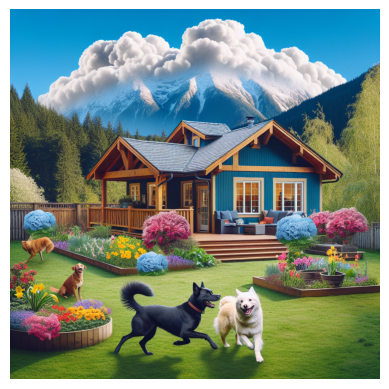

Displaying image 2: ./out/8b1fd634-a91d-4d24-8eef-afadea4420ca.png


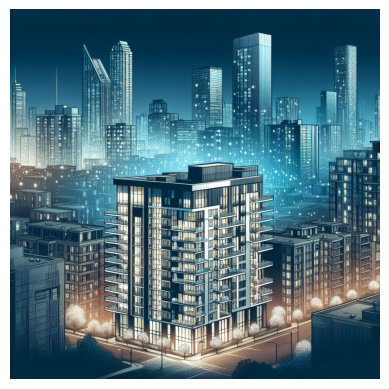

Displaying image 3: ./out/68d1d38e-2bd9-4984-8156-1067e01b3e10.png


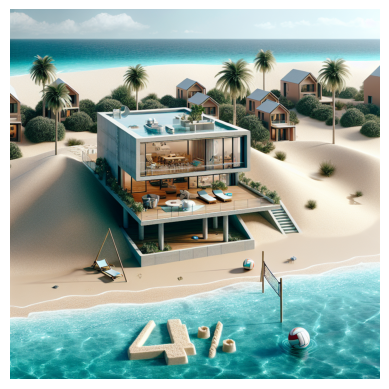

Displaying image 4: ./out/5bfdeb99-3dd2-4630-bd8e-68c4e016c1f9.png


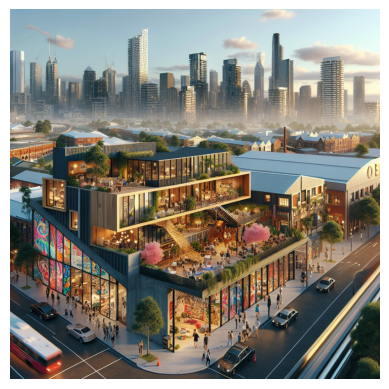

Displaying image 5: ./out/042ec602-76a4-4fe3-83b5-d53d203e1ff5.png


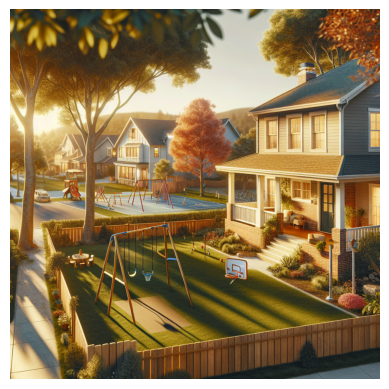

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


# Function to display an image
def display_image(image_path):
    img = Image.open(image_path)  # Open the image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Turn off axis
    plt.show()  # Show the image

# Display images from DataFrame
for index, row in image_df.iterrows():
    print(f"Displaying image {index+1}: {row['image_path']}")
    display_image(row['image_path'])  # Call the function to display the image


---------------------

## The Interactive Approval System

In [39]:
import ipywidgets as widgets
import os

response_index = 0
image_df["approved"] = pd.Series(dtype="str")  # Adding a new column to store feedback


def on_button_clicked(b):
    global response_index
    user_feedback = 1 if b.description == "\U0001F44D" else 0
    image_df.at[response_index, "approved"] = user_feedback

    response_index += 1
    if response_index < len(image_df):
        update_response()
    else:
        if not os.path.exists("data"):
            os.makedirs("data")
        image_df.to_csv("data/checked_customer_marketing_images.csv", index=False)
        approved_df = image_df[image_df["approved"] == 1]
        print(f"Number of approved images: {len(approved_df)}")


def update_response():
    if response_index >= len(image_df):
        new_response = "<p>No more responses</p>"
    else:
        next_image = image_df.iloc[response_index]
        image_html = (
            f'<img src="{next_image["image_path"]}" style="max-width: 400px;"/>'
            if next_image["image_path"]
            else "No Image"
        )
        new_response = f"{image_html}<p></p>"
    response.value = new_response
    count_label.value = f"Response: {response_index + 1} / {len(image_df)}"


response = widgets.HTML()
count_label = widgets.Label()

update_response()

thumbs_up_button = widgets.Button(description="\U0001F44D")
thumbs_up_button.on_click(on_button_clicked)

thumbs_down_button = widgets.Button(description="\U0001F44E")
thumbs_down_button.on_click(on_button_clicked)

button_box = widgets.HBox([thumbs_down_button, thumbs_up_button])

display(response, button_box, count_label)

HTML(value='<img src="./out/2fa21ac4-b02f-438d-9ee8-1ddd868b009f.png" style="max-width: 400px;"/><p></p>')

Label(value='Response: 1 / 5')

In [44]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [45]:
from google.colab import output
output.disable_custom_widget_manager()

-----

Here's a breakdown of the key components of this code:

1. **Initialization and DataFrame Update**:
   - The `response_index` variable is initialized to track the current image being evaluated.
   - A new column, `approved`, is added to the `image_df` DataFrame to store the evaluation feedback for each image.

2. **Button Click Event Handling**:
   - The `on_button_clicked` function updates the `approved` status of the current image based on the button clicked (thumbs up or thumbs down).
   - It increments the `response_index` to move to the next image and calls `update_response` to refresh the displayed image.

3. **Response Update and Display**:
   - The `update_response` function dynamically updates the content displayed to the evaluator. It shows the current image (if available) and updates the progress label (`count_label`).
   - If all images have been evaluated, it displays a message indicating no more responses are left.

4. **Data Saving and Summary**:
   - Once all images have been evaluated, the system saves the feedback to a CSV file. It also calculates and displays the number of images approved.

5. **Interactive Widgets Setup**:
   - Two buttons (`thumbs_up_button` and `thumbs_down_button`) are created and linked to the `on_button_clicked` event handler.
   - These buttons allow the evaluator to approve or disapprove each image.
   - The `response` and `count_label` widgets are used to display the current image and the evaluation progress, respectively.

6. **Displaying the Interactive Elements**:
   - Finally, the interactive elements (image, buttons, and labels) are displayed in a horizontal box layout using `display(response, button_box, count_label)`.

This interactive approval system is an efficient tool for quickly gathering human feedback on a set of images, making it a valuable component for human-based evaluations in LLM projects.

---

## Enhancing Evaluation Scores for LLMs

To elevate the performance of your Large Language Models (LLMs) and boost evaluation scores, consider implementing these strategies:

1. **Optimized Prompts**: Employ prompt engineering techniques to refine your prompts. Thoughtfully crafted prompts can significantly improve the LLM's output quality and, in turn, its evaluation scores.

2. **Model Selection**: Experiment with various models. More sophisticated models often yield better results, but don't overlook the potential of smaller models, especially in the context of prompt refinement.

3. **Enhanced Retrieval Techniques**: Inject relevant context into your prompts dynamically to enhance accuracy. Improve retrieval by expanding the range of sourced documents, experimenting with different similarity metrics, and employing hybrid search strategies that combine various methods for more comprehensive results.

4. **Task Decomposition with Multiple LLM Chains**: Break down complex tasks into simpler components and address each with a dedicated LLM chain. This specialized approach allows for more targeted prompt optimization and can lead to superior outcomes.

5. **Fine-Tuning with Targeted Data**: If adjustments to prompts and retrieval processes fall short, consider fine-tuning your LLM with a curated, labeled dataset. This dataset can be generated through GPT-4 or human labeling, depending on your specific requirements and resources.

By embracing these strategies, you can fine-tune your LLM's performance to meet and exceed evaluation benchmarks. Remember, the key to success lies in a balanced combination of technology and technique, ensuring your LLM not only meets but surpasses expectations.

---

In conclusion, enhancing your LLM's evaluation scores is a dynamic process that combines the art of prompt engineering with the science of model optimization. By continuously refining your approach and staying adaptable to new techniques and technologies, you can ensure your LLM delivers top-tier performance, making it a valuable asset in your toolkit.